In [1]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv("churn_data.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:

columnas_seleccionadas = ["SeniorCitizen", "InternetService", "TechSupport", "OnlineSecurity",
                          "DeviceProtection", "tenure", "Contract", "TotalCharges", "Churn"]


df_churn = df[columnas_seleccionadas].copy()

# Mostrar las primeras filas del nuevo DataFrame para verificar que se haya creado correctamente
print(df_churn.head())


   SeniorCitizen InternetService TechSupport OnlineSecurity DeviceProtection  \
0              0             DSL          No             No               No   
1              0             DSL          No            Yes              Yes   
2              0             DSL          No            Yes               No   
3              0             DSL         Yes            Yes              Yes   
4              0     Fiber optic          No             No               No   

   tenure        Contract TotalCharges Churn  
0       1  Month-to-month        29.85    No  
1      34        One year       1889.5    No  
2       2  Month-to-month       108.15   Yes  
3      45        One year      1840.75    No  
4       2  Month-to-month       151.65   Yes  


In [3]:
# Filtrar el DataFrame
df_filtrado = df_churn[(df_churn['Contract'] == 'Month-to-month') & 
                       (df_churn['InternetService'].isin(['DSL', 'Fiber optic']))]


print(df_filtrado.head())

   SeniorCitizen InternetService TechSupport OnlineSecurity DeviceProtection  \
0              0             DSL          No             No               No   
2              0             DSL          No            Yes               No   
4              0     Fiber optic          No             No               No   
5              0     Fiber optic          No             No              Yes   
6              0     Fiber optic          No             No               No   

   tenure        Contract TotalCharges Churn  
0       1  Month-to-month        29.85    No  
2       2  Month-to-month       108.15   Yes  
4       2  Month-to-month       151.65   Yes  
5       8  Month-to-month        820.5   Yes  
6      22  Month-to-month       1949.4    No  


In [4]:
# Convertir la columna "TotalCharges" a números (float)
df_filtrado['TotalCharges'] = pd.to_numeric(df_filtrado['TotalCharges'], errors='coerce')

# Calcular el promedio de la columna "TotalCharges" después de la conversión
promedio_total_charges = df_filtrado['TotalCharges'].mean()

# Crear la nueva columna "mayor al promedio"
df_filtrado['mayor al promedio'] = df_filtrado['TotalCharges'].apply(lambda x: 'Yes' if x > promedio_total_charges else 'No')

# Mostrar las primeras filas del DataFrame filtrado con la nueva columna
print(df_filtrado.head())


   SeniorCitizen InternetService TechSupport OnlineSecurity DeviceProtection  \
0              0             DSL          No             No               No   
2              0             DSL          No            Yes               No   
4              0     Fiber optic          No             No               No   
5              0     Fiber optic          No             No              Yes   
6              0     Fiber optic          No             No               No   

   tenure        Contract  TotalCharges Churn mayor al promedio  
0       1  Month-to-month         29.85    No                No  
2       2  Month-to-month        108.15   Yes                No  
4       2  Month-to-month        151.65   Yes                No  
5       8  Month-to-month        820.50   Yes                No  
6      22  Month-to-month       1949.40    No               Yes  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22292\800811066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['TotalCharges'] = pd.to_numeric(df_filtrado['TotalCharges'], errors='coerce')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22292\800811066.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['mayor al promedio'] = df_filtrado['TotalCharges'].apply(lambda x: 'Yes' if x > promedio_total_charges else 'No')


In [5]:
# Eliminar las columnas "TotalCharges" y "Contract" del DataFrame
df_filtrado = df_filtrado.drop(['TotalCharges', 'Contract'], axis=1)

# Mostrar las primeras filas del DataFrame con las columnas eliminadas
print(df_filtrado.head())

   SeniorCitizen InternetService TechSupport OnlineSecurity DeviceProtection  \
0              0             DSL          No             No               No   
2              0             DSL          No            Yes               No   
4              0     Fiber optic          No             No               No   
5              0     Fiber optic          No             No              Yes   
6              0     Fiber optic          No             No               No   

   tenure Churn mayor al promedio  
0       1    No                No  
2       2   Yes                No  
4       2   Yes                No  
5       8   Yes                No  
6      22    No               Yes  


In [6]:
# Crear la nueva columna "old_customer" basada en la columna "tenure"
df_filtrado['old_customer'] = df_filtrado['tenure'].apply(lambda x: 'Yes' if x > 12 else 'No')

# Mostrar las primeras filas del DataFrame con la nueva columna agregada
print(df_filtrado.head())

   SeniorCitizen InternetService TechSupport OnlineSecurity DeviceProtection  \
0              0             DSL          No             No               No   
2              0             DSL          No            Yes               No   
4              0     Fiber optic          No             No               No   
5              0     Fiber optic          No             No              Yes   
6              0     Fiber optic          No             No               No   

   tenure Churn mayor al promedio old_customer  
0       1    No                No           No  
2       2   Yes                No           No  
4       2   Yes                No           No  
5       8   Yes                No           No  
6      22    No               Yes          Yes  


In [7]:
# Eliminar las columnas "TotalCharges" y "Contract" del DataFrame
df_filtrado = df_filtrado.drop(['tenure'], axis=1)

# Mostrar las primeras filas del DataFrame con las columnas eliminadas
print(df_filtrado.head())

   SeniorCitizen InternetService TechSupport OnlineSecurity DeviceProtection  \
0              0             DSL          No             No               No   
2              0             DSL          No            Yes               No   
4              0     Fiber optic          No             No               No   
5              0     Fiber optic          No             No              Yes   
6              0     Fiber optic          No             No               No   

  Churn mayor al promedio old_customer  
0    No                No           No  
2   Yes                No           No  
4   Yes                No           No  
5   Yes                No           No  
6    No               Yes          Yes  


In [8]:
# Reemplazar los valores en la columna "InternetService"
df_filtrado['InternetService'] = df_filtrado['InternetService'].replace({'DSL': 'No', 'Fiber optic': 'Yes'})

# Verificar que se hayan realizado los cambios
print(df_filtrado['InternetService'].value_counts())

InternetService
Yes    2128
No     1223
Name: count, dtype: int64


In [9]:
df_filtrado

,SeniorCitizen,InternetService,TechSupport,OnlineSecurity,DeviceProtection,Churn,mayor al promedio,old_customer
0,0,No,No,No,No,No,No,No
2,0,No,No,Yes,No,Yes,No,No
4,0,Yes,No,No,No,Yes,No,No
5,0,Yes,No,No,Yes,Yes,No,No
6,0,Yes,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...
7033,0,Yes,No,No,No,No,Yes,Yes
7034,0,Yes,No,Yes,Yes,Yes,Yes,Yes
7035,0,Yes,No,No,No,No,No,Yes
7040,0,No,No,Yes,No,No,No,No


In [10]:
# Reemplazar los valores en la columna "SeniorCitizen"
df_filtrado['SeniorCitizen'] = df_filtrado['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

# Verificar que se hayan realizado los cambios
df_filtrado

,SeniorCitizen,InternetService,TechSupport,OnlineSecurity,DeviceProtection,Churn,mayor al promedio,old_customer
0,No,No,No,No,No,No,No,No
2,No,No,No,Yes,No,Yes,No,No
4,No,Yes,No,No,No,Yes,No,No
5,No,Yes,No,No,Yes,Yes,No,No
6,No,Yes,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...
7033,No,Yes,No,No,No,No,Yes,Yes
7034,No,Yes,No,Yes,Yes,Yes,Yes,Yes
7035,No,Yes,No,No,No,No,No,Yes
7040,No,No,No,Yes,No,No,No,No


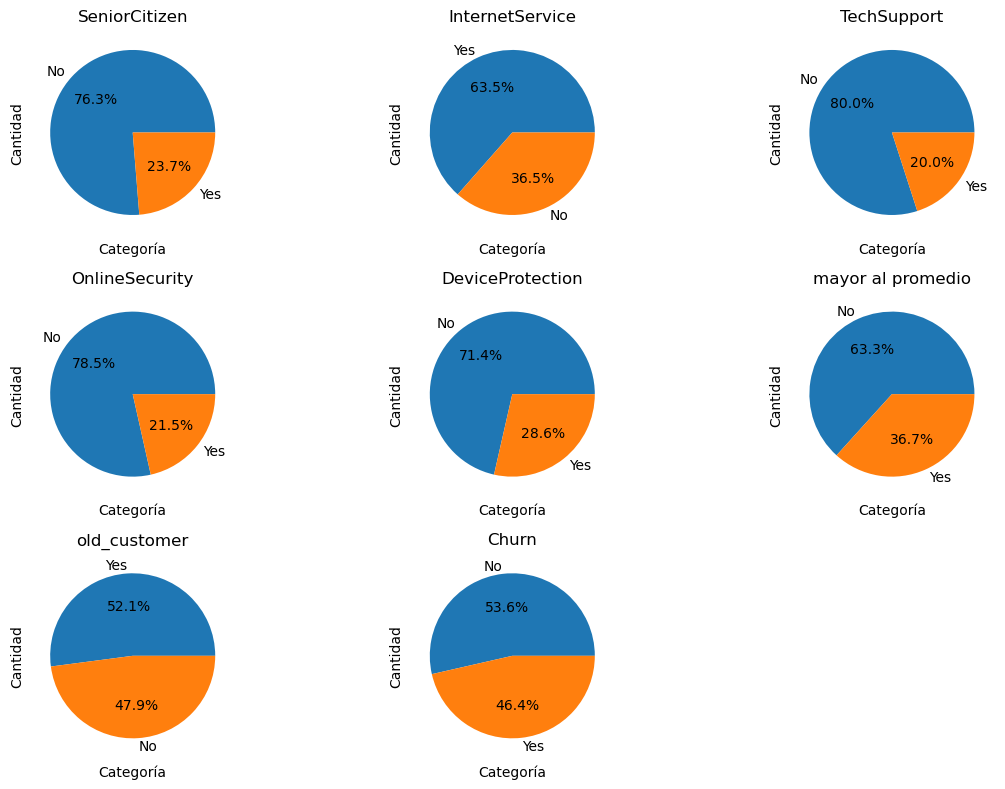

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt

# Lista de columnas para las que deseas graficar los conteos de "Yes" y "No"
columnas = ['SeniorCitizen', 'InternetService', 'TechSupport', 'OnlineSecurity', 'DeviceProtection', 'mayor al promedio', 'old_customer', 'Churn']

# Configuración de la figura
plt.figure(figsize=(12, 8))

# Iterar sobre cada columna y graficar los conteos de "Yes" y "No"
for i, columna in enumerate(columnas, 1):
    plt.subplot(3, 3, i)
    df_filtrado[columna].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(columna)
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para que sean legibles

plt.tight_layout()
plt.show()

# Ajustar el espaciado entre las subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()




In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Dividir los datos en características (X) y etiquetas (y)
X = df_filtrado.drop('Churn', axis=1)  # características
y = df_filtrado['Churn']  # etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

# Obtener los coeficientes y el intercepto del modelo
coeficientes = model.coef_[0]
intercepto = model.intercept_[0]

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_encoded)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística:", accuracy)

Precisión del modelo de regresión logística: 0.6602086438152012


In [35]:
# import numpy as np

# Solicitar al usuario que ingrese los valores de las características
senior_citizen = int(input("Senior Citizen (0 for No, 1 for Yes): "))
internet_service = input("Internet Service (has a Fiber optic 1 for Yes,1 for No): ")
tech_support = input("Tech Support (Yes or No): ")
online_security = input("Online Security (Yes or No): ")
device_protection = input("Device Protection (Yes or No): ")
mayor_al_promedio = input("Mayor al promedio (Yes or No): ")
old_customer = input("Old Customer (Yes or No): ")

# Codificar los valores ingresados por el usuario
# Aquí necesitarás asegurarte de que los valores ingresados coincidan con las categorías utilizadas en el conjunto de datos original
internet_service_dsl = 1 if internet_service == "DSL" else 0
internet_service_fiber_optic = 1 if internet_service == "Fiber optic" else 0
tech_support_yes = 1 if tech_support == "Yes" else 0
tech_support_no = 1 if tech_support == "No" else 0
online_security_yes = 1 if online_security == "Yes" else 0
online_security_no = 1 if online_security == "No" else 0
device_protection_yes = 1 if device_protection == "Yes" else 0
device_protection_no = 1 if device_protection == "No" else 0
mayor_al_promedio_yes = 1 if mayor_al_promedio == "Yes" else 0
mayor_al_promedio_no = 1 if mayor_al_promedio == "No" else 0
old_customer_yes = 1 if old_customer == "Yes" else 0
old_customer_no = 1 if old_customer == "No" else 0

# Calcular el valor log-odds usando los coeficientes del modelo
log_odds = (coeficientes[0] * senior_citizen +
            coeficientes[1] * internet_service_dsl +
            coeficientes[2] * internet_service_fiber_optic +
            coeficientes[3] * tech_support_yes +
            coeficientes[4] * tech_support_no +
            coeficientes[5] * online_security_yes +
            coeficientes[6] * online_security_no +
            coeficientes[7] * device_protection_yes +
            coeficientes[8] * device_protection_no +
            coeficientes[9] * mayor_al_promedio_yes +
            coeficientes[10] * mayor_al_promedio_no +
            coeficientes[11] * old_customer_yes +
            coeficientes[12] * old_customer_no +
            intercepto)

# Aplicar la función sigmoide inversa para obtener la probabilidad de la clase positiva (Churn igual a "Yes")
probabilidad_churn = 1 / (1 + np.exp(-log_odds))

umbral = 0.35  # Ajusta este umbral según tus necesidades
print(coeficientes)
print(probabilidad_churn)
if probabilidad_churn > umbral:
    print("Churn: No")
else:
    print("Churn: Yes")


Senior Citizen (0 for No, 1 for Yes): 1
Internet Service (has a Fiber optic 1 for Yes,1 for No): 0
Tech Support (Yes or No): 0
Online Security (Yes or No): 0
Device Protection (Yes or No): 0
Mayor al promedio (Yes or No): 1
Old Customer (Yes or No): 0
[-0.20320121  0.20283745 -0.54567557  0.54531181  0.22980929 -0.23017305
  0.23269218 -0.23305594 -0.01769415  0.01733039  0.2056593  -0.20602306
  0.40481581 -0.40517957]
0.3245117415941184
Churn: Yes
